In [21]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shutil import copy2

from pathlib import Path
%matplotlib inline

In [22]:
data_path = (
    Path.home()
    / "Washington State University (email.wsu.edu)"
    / "Carbon Lab Research Group - Documents"
    / "Synchrotron Logistics and Data"
    / "ALS - Berkeley"
    / "Data"
    / "BL1101"
    / "2023Nov"
    / "XRR"
    / "stats"
    / "2023 11 11"
)
mhz_data = data_path / "CCD Scan 82270" / "CCD"
khz_data = data_path / "CCD Scan 82271" / "CCD"

In [24]:
mhz_experiments = [exp.name for exp in mhz_data.iterdir() if exp.is_dir()]
khz_experiments = [exp.name for exp in khz_data.iterdir() if exp.is_dir()]
display(mhz_experiments)
display(khz_experiments)

['HOS 10 ET 0.001',
 'HOS 11 ET 0.001',
 'HOS 12 ET 0.001',
 'HOS 12 ET 0.01',
 'HOS 12 ET 0.1',
 'HOS 8 ET 0.001',
 'HOS 8.25 ET 0.001',
 'HOS 8.5 ET 0.001',
 'HOS 8.75 ET 0.001',
 'HOS 9 ET 0.001']

['HOS 10 ET 0.001',
 'HOS 11 ET 0.001',
 'HOS 12 ET 0.001',
 'HOS 12 ET 0.01',
 'HOS 12 ET 0.1',
 'HOS 8 ET 0.001',
 'HOS 8.25 ET 0.001',
 'HOS 8.5 ET 0.001',
 'HOS 8.75 ET 0.001',
 'HOS 9 ET 0.001']

In [31]:
def load_fits(experiment):
    light = []
    dark = []
    for file in experiment.glob("*.fits"):
        with fits.open(file) as hdul:
            header = hdul[0].header
            if header["CCD Camera Shutter Inhibit"] == 0:
                light.append(hdul[2].data)
            else:
                dark.append(hdul[2].data)
    return light, dark


mhz_loaded = {exp: load_fits(mhz_data / exp) for exp in mhz_experiments}
khz_loaded = {exp: load_fits(khz_data / exp) for exp in khz_experiments}

[array([[565, 564, 571, ..., 595, 571, 555],
        [561, 565, 549, ..., 540, 566, 556],
        [574, 571, 591, ..., 566, 547, 579],
        ...,
        [592, 578, 599, ..., 578, 590, 585],
        [590, 606, 594, ..., 588, 595, 586],
        [676, 681, 671, ..., 689, 657, 673]], dtype=uint16),
 array([[548, 576, 568, ..., 567, 565, 559],
        [580, 553, 579, ..., 603, 576, 574],
        [582, 571, 580, ..., 556, 583, 580],
        ...,
        [581, 590, 572, ..., 595, 577, 597],
        [599, 616, 611, ..., 632, 615, 608],
        [677, 680, 643, ..., 689, 674, 675]], dtype=uint16),
 array([[582, 572, 543, ..., 574, 556, 603],
        [596, 555, 597, ..., 570, 541, 555],
        [572, 557, 549, ..., 565, 567, 573],
        ...,
        [584, 560, 583, ..., 600, 591, 594],
        [593, 598, 585, ..., 602, 603, 588],
        [684, 662, 708, ..., 696, 693, 679]], dtype=uint16),
 array([[589, 556, 576, ..., 576, 555, 571],
        [580, 575, 577, ..., 579, 572, 581],
        [553,

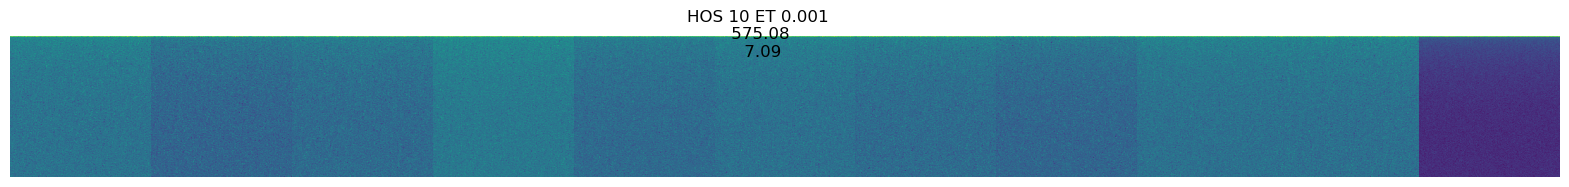

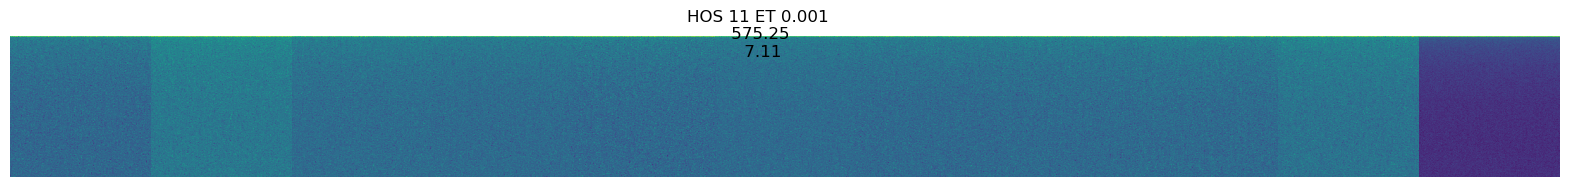

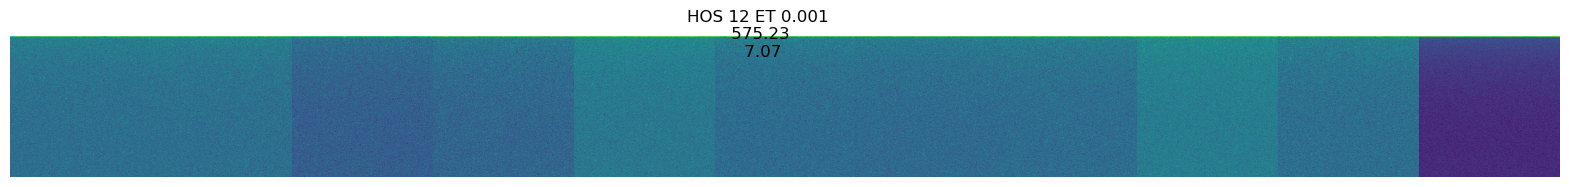

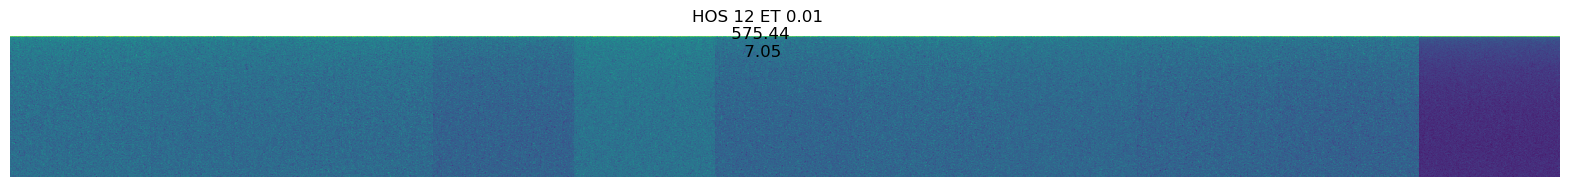

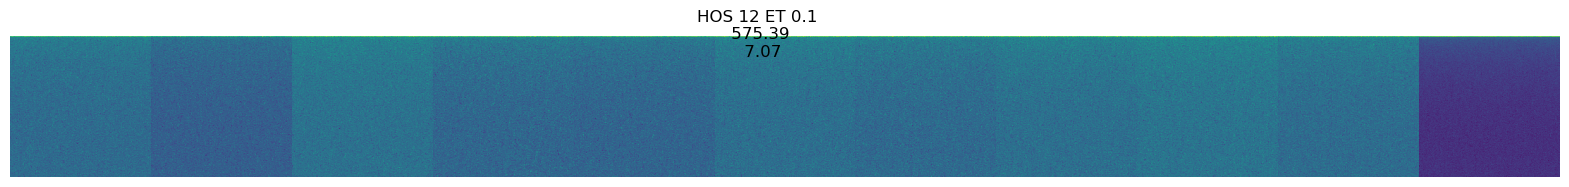

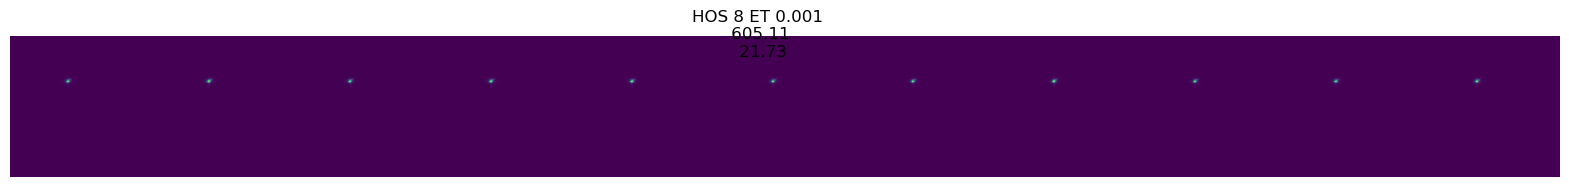

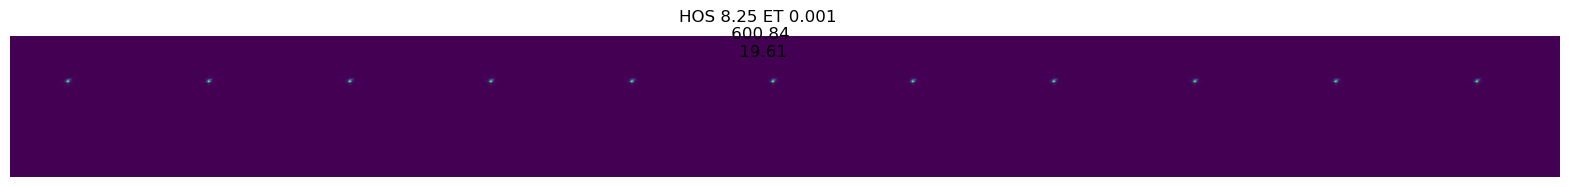

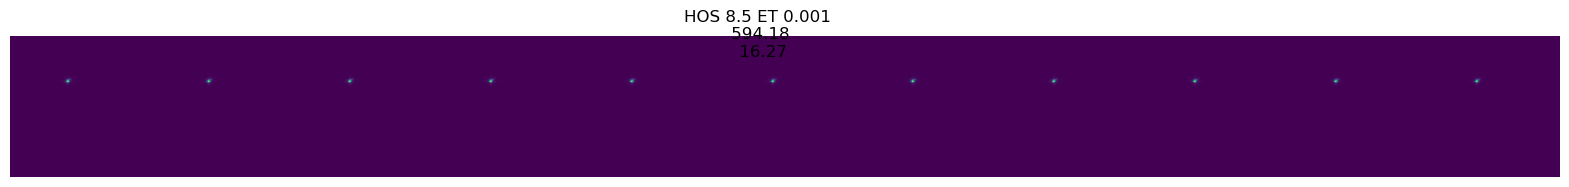

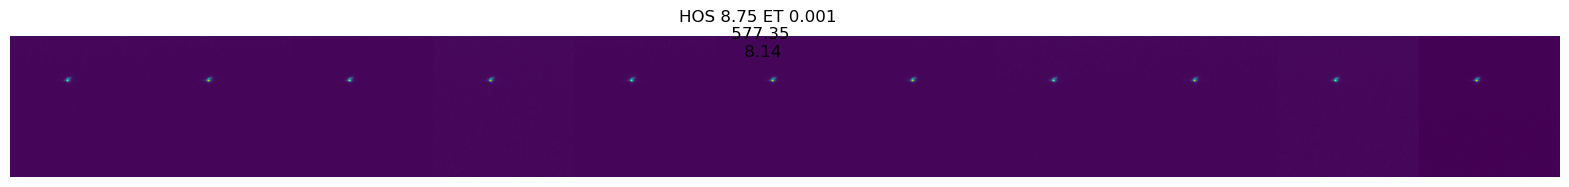

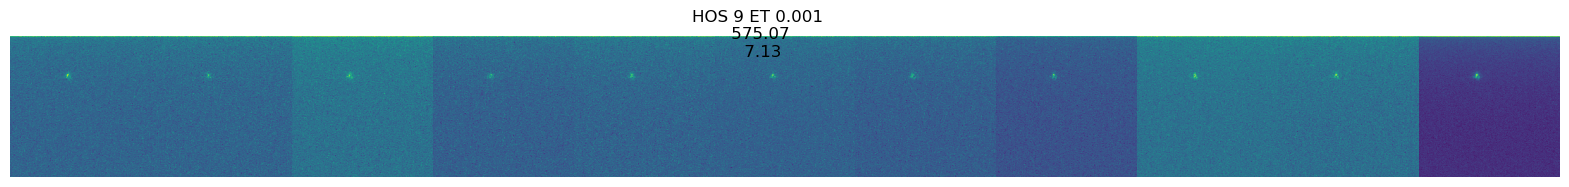

In [50]:
for i in range(10):
    key = mhz_experiments[i]
    fig, ax = plt.subplots(
        ncols=11, figsize=(20, 2), gridspec_kw={"wspace": 0, "hspace": 0}
    )
    for j in range(11):
        if j < len(mhz_loaded[key][0]):
            ax[j].imshow(mhz_loaded[key][0][j], origin="lower")
            ax[j].set_axis_off()
        else:
            averagerd_image = np.mean(mhz_loaded[key][0], axis=0)
            std = np.std(mhz_loaded[key], axis=0)
            ax[j].imshow(averagerd_image, origin="lower")
            ax[j].set_axis_off()
            fig.suptitle(
                f"Experiment:{key} {np.mean(averagerd_image):.2f}  {np.mean(std):.2f}"
            )